Model $$ f_\theta(x) = \theta_0 + \theta_1 x $$

Parameters $$ \begin{align} \theta &=  \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}\\ &= \begin{bmatrix} 0.5 \\ 1.25 \end{bmatrix} \end{align} $$

Cost Function $$ J(\theta) = \frac{1}{2m} \sum_{i=0}^m (f_\theta(x^{(i)}) - y^{(i)})^2$$

In [35]:
import sklearn.datasets as ds
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [45]:
class SyntheticData(Dataset):
    def __init__(self, n_samples=200, n_features=1, n_informative=1, noise=20, coefficients=True, random_state=42):
        X, y, coefs = ds.make_regression(n_samples=n_samples,
                                        n_features=n_features,
                                        n_informative=n_informative,
                                        noise=noise,
                                        coef=coefficients,
                                        random_state=random_state)
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
        self.coefs = coefs

        self.n_samples = X.shape[0]

    def __getitem__(self, i):
        return self.X[i], self.y[i]

    def __len__(self):
        return self.n_samples

In [37]:
synthetic_data = SyntheticData()

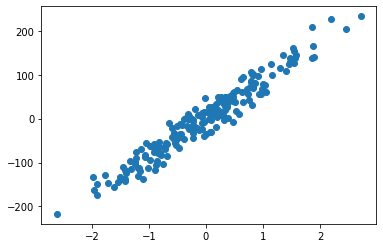

In [47]:
plt.scatter(synthetic_data.X, synthetic_data.y)

In [39]:
random_seed = 42
batch_size = 1

# withhold 20% of the data for validation
validation_split = 0.2
dataset_size = len(synthetic_data)

# [1,2,3,4,...,m]
indices = list(range(dataset_size))

# 0.2 * 200 = 40 -> 40 datapoints for validation
split = int(np.floor(validation_split * dataset_size))

In [40]:
train_indices, val_indices = indices[split:], indices[:split]

In [41]:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(synthetic_data, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(synthetic_data, batch_size=batch_size,
                                                sampler=valid_sampler)

In [42]:
for i, (x, y) in enumerate(validation_loader):
    print(i, x, y)

0 tensor([[0.3853]], dtype=torch.float64) tensor([1.8242], dtype=torch.float64)
1 tensor([[-0.4695]], dtype=torch.float64) tensor([-40.7118], dtype=torch.float64)
2 tensor([[0.8219]], dtype=torch.float64) tensor([74.6334], dtype=torch.float64)
3 tensor([[-0.1857]], dtype=torch.float64) tensor([-18.3916], dtype=torch.float64)
4 tensor([[2.4632]], dtype=torch.float64) tensor([203.8563], dtype=torch.float64)
5 tensor([[1.8658]], dtype=torch.float64) tensor([209.2133], dtype=torch.float64)
6 tensor([[-0.2647]], dtype=torch.float64) tensor([-24.6925], dtype=torch.float64)
7 tensor([[0.0602]], dtype=torch.float64) tensor([-0.1364], dtype=torch.float64)
8 tensor([[-0.9905]], dtype=torch.float64) tensor([-93.0888], dtype=torch.float64)
9 tensor([[1.0035]], dtype=torch.float64) tensor([78.7340], dtype=torch.float64)
10 tensor([[-0.0720]], dtype=torch.float64) tensor([-8.8862], dtype=torch.float64)
11 tensor([[-1.4123]], dtype=torch.float64) tensor([-141.0303], dtype=torch.float64)
12 tensor([[-

In [43]:
class LinearModel:
    
    def __init__(self):
        self.theta_0 = 0.5
        self.theta_1 = 1.25
        
    def predict(self, x):
        return self.theta_0 + self.theta_1 * x

    def measure_cost(self, validation_loader):
        total_cost = 0
        n_samples = len(validation_loader)
        for _, (x, y) in enumerate(validation_loader):
            total_cost += (self.predict(x) - y) ** 2
        return total_cost / (2 * n_samples)

In [44]:
model = LinearModel()
model.measure_cost(validation_loader)

tensor([[3642.3555]], dtype=torch.float64)